#### Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data Collection and Analysis

In [5]:
# loading the diabetes dataset to a pandas as DataFrame
diabetes_dataset = pd.read_csv('G:\\Data Bases For 99DaysWithCPC\\Building Machine Learning model\\Logistic Regression\\diabetes.csv')

In [6]:
# show the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# separeting the data and labels 
features = diabetes_dataset.drop(columns='Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [12]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data Standardization

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(features)

StandardScaler()

In [16]:
standardized_data = scaler.transform(features)

In [17]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
features = standardized_data
target = diabetes_dataset['Outcome']

### Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [20]:
features.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

### Training the Model

In [21]:
log_Reg = LogisticRegression(max_iter=1000)

In [22]:
log_Reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

#### Accuracy Score

In [23]:
# accuracy score on the training data
X_train_prediciton = log_Reg.predict(X_train)

In [24]:
training_data_accuracy =accuracy_score(y_train, X_train_prediciton)

In [25]:
training_data_accuracy

0.7801302931596091

In [26]:
# accuracy score on the test data
X_test_prediction = log_Reg.predict(X_test)

In [27]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [28]:
test_data_accuracy

0.7662337662337663

In [29]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



In [30]:
print(confusion_matrix(y_test, X_test_prediction))

[[96 13]
 [23 22]]


In [31]:
cm = confusion_matrix(y_test, X_test_prediction)

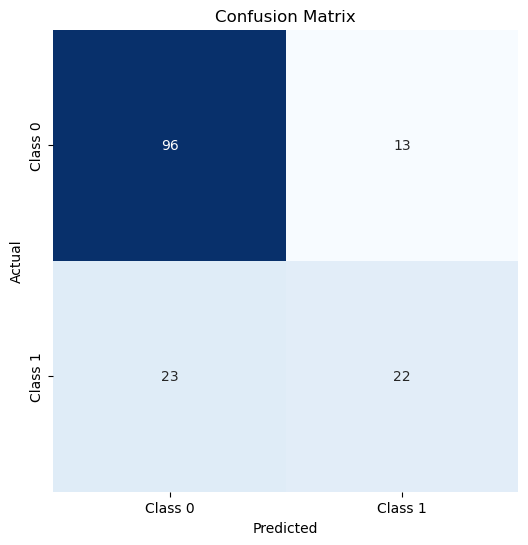

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Making a Predictive System

In [33]:
# Input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

In [34]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [35]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [36]:
input_data_reshaped.shape

(1, 8)

In [37]:
input_data_df = pd.DataFrame(input_data_reshaped, columns=[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
])

In [38]:
# standardize the input data
std_data = scaler.transform(input_data_df)

In [39]:
std_data

array([[ 0.3429808 ,  1.41167241,  0.14964075, -0.09637905,  0.82661621,
        -0.78595734,  0.34768723,  1.51108316]])

In [40]:
prediction = log_Reg.predict(std_data)

In [41]:
prediction

array([1], dtype=int64)

In [42]:
if (prediction == 0):
    print('The person is not Diabetic')
else:
    print('This person is Diabetic')

This person is Diabetic
